# Mission: Predict heart attack risk using a rich dataset with varied features.
Data Source: Data collected from [source details here].
The dataset contains columns such as Age, Cholesterol, Heart rate, Diabetes, Family History,
Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems,
Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides,
Physical Activity Days Per Week, Sleep Hours Per Day, Heart Attack Risk (Binary), Blood sugar,
CK-MB, Troponin, Heart Attack Risk (Text), Gender, Systolic and Diastolic blood pressure.
(Adjust the file path and cleaning steps based on your actual data format.)

# Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


Load and Explore the Dataset

In [20]:
# Load dataset
df = pd.read_csv("heart_attack_prediction_dataset.csv")  

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

Data Preprocessing
Convert categorical variables and handle missing values

In [23]:
# Drop unnecessary columns
df = df.drop(columns=["Patient ID", "Country", "Continent", "Hemisphere", "Sex", "Diet"], errors="ignore")

# Handle Missing Values
print("Missing values per column:\n", df.isnull().sum())  # Check for missing values

# Convert 'Blood Pressure' to two separate columns (Systolic and Diastolic)
if "Blood Pressure" in df.columns:
    df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
    df = df.drop(columns=["Blood Pressure"])

# Fill missing values for numeric columns with the median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Define Features (X) and Target Variable (y)
X = df.drop(columns=["Heart Attack Risk"])  # Independent variables (drop target column)
y = df["Heart Attack Risk"]  # Target variable

# Split Data into Training & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Show the updated DataFrame for confirmation
print("\nUpdated DataFrame:")
print(df.head())


Missing values per column:
 Age                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
dtype: int64
Training set size: (7010, 19)
Test set size: (1753, 19)

Updated DataFrame:
   Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  Obesity  \
0   67          208          72         0               0        1        0   
1   21          389   

Data Visualization

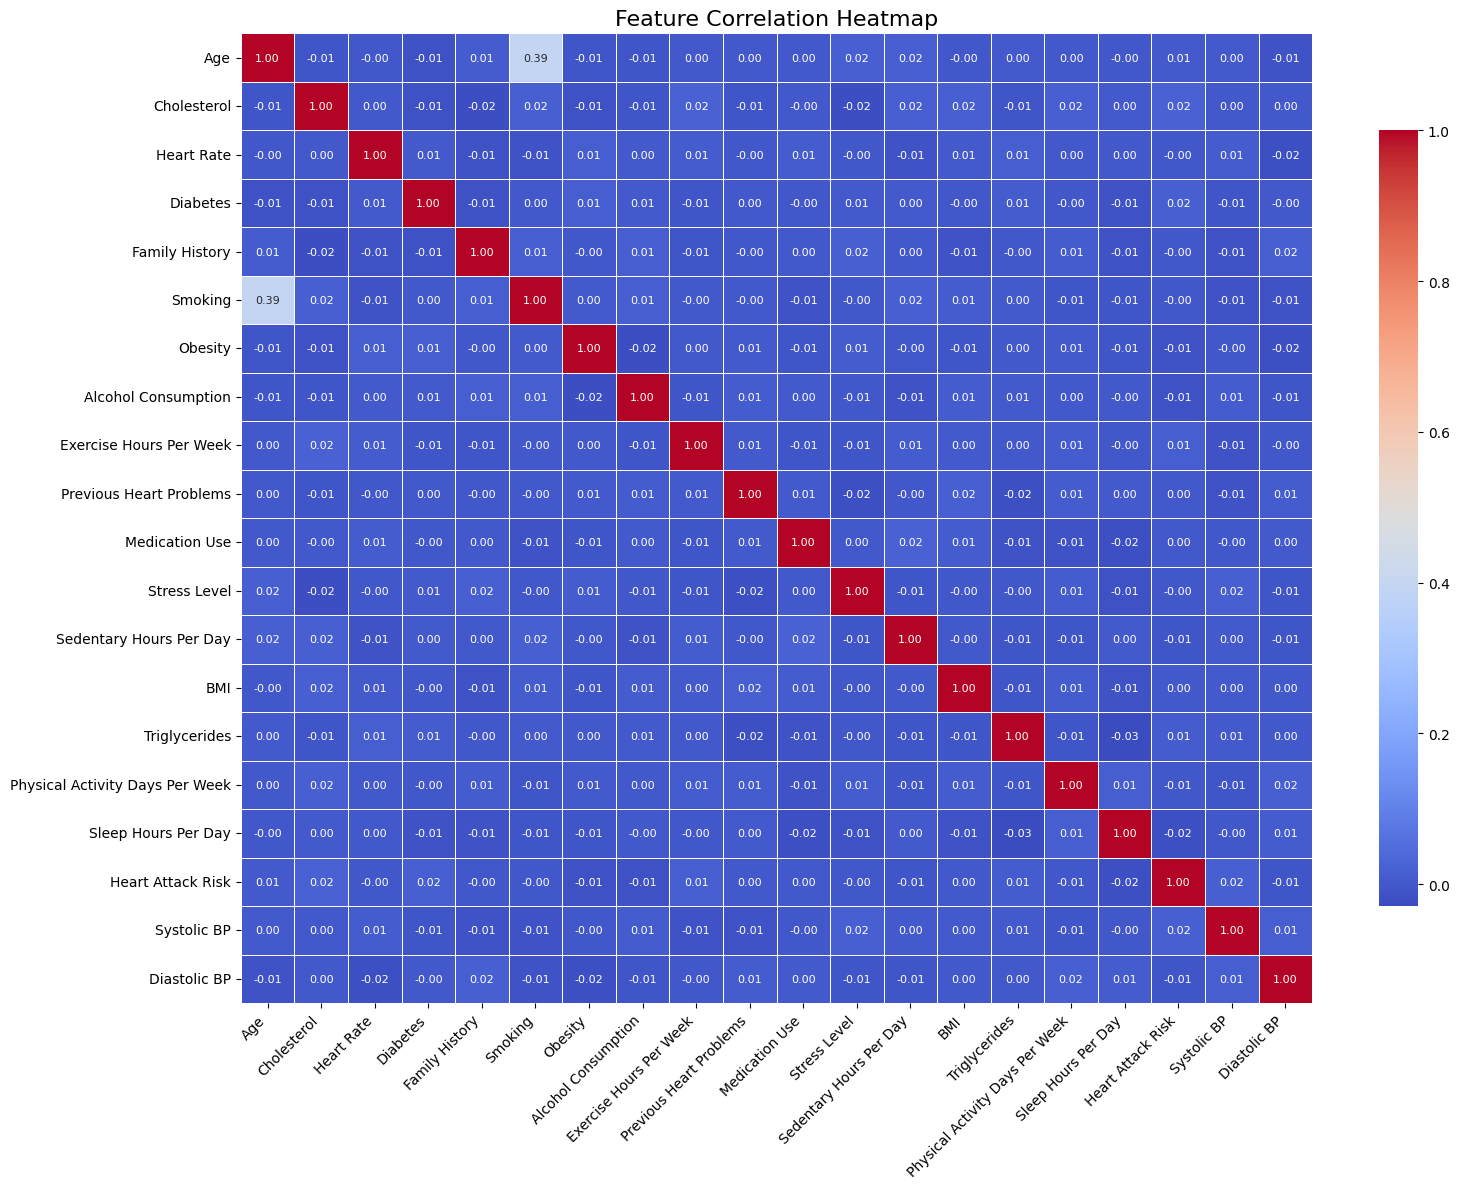

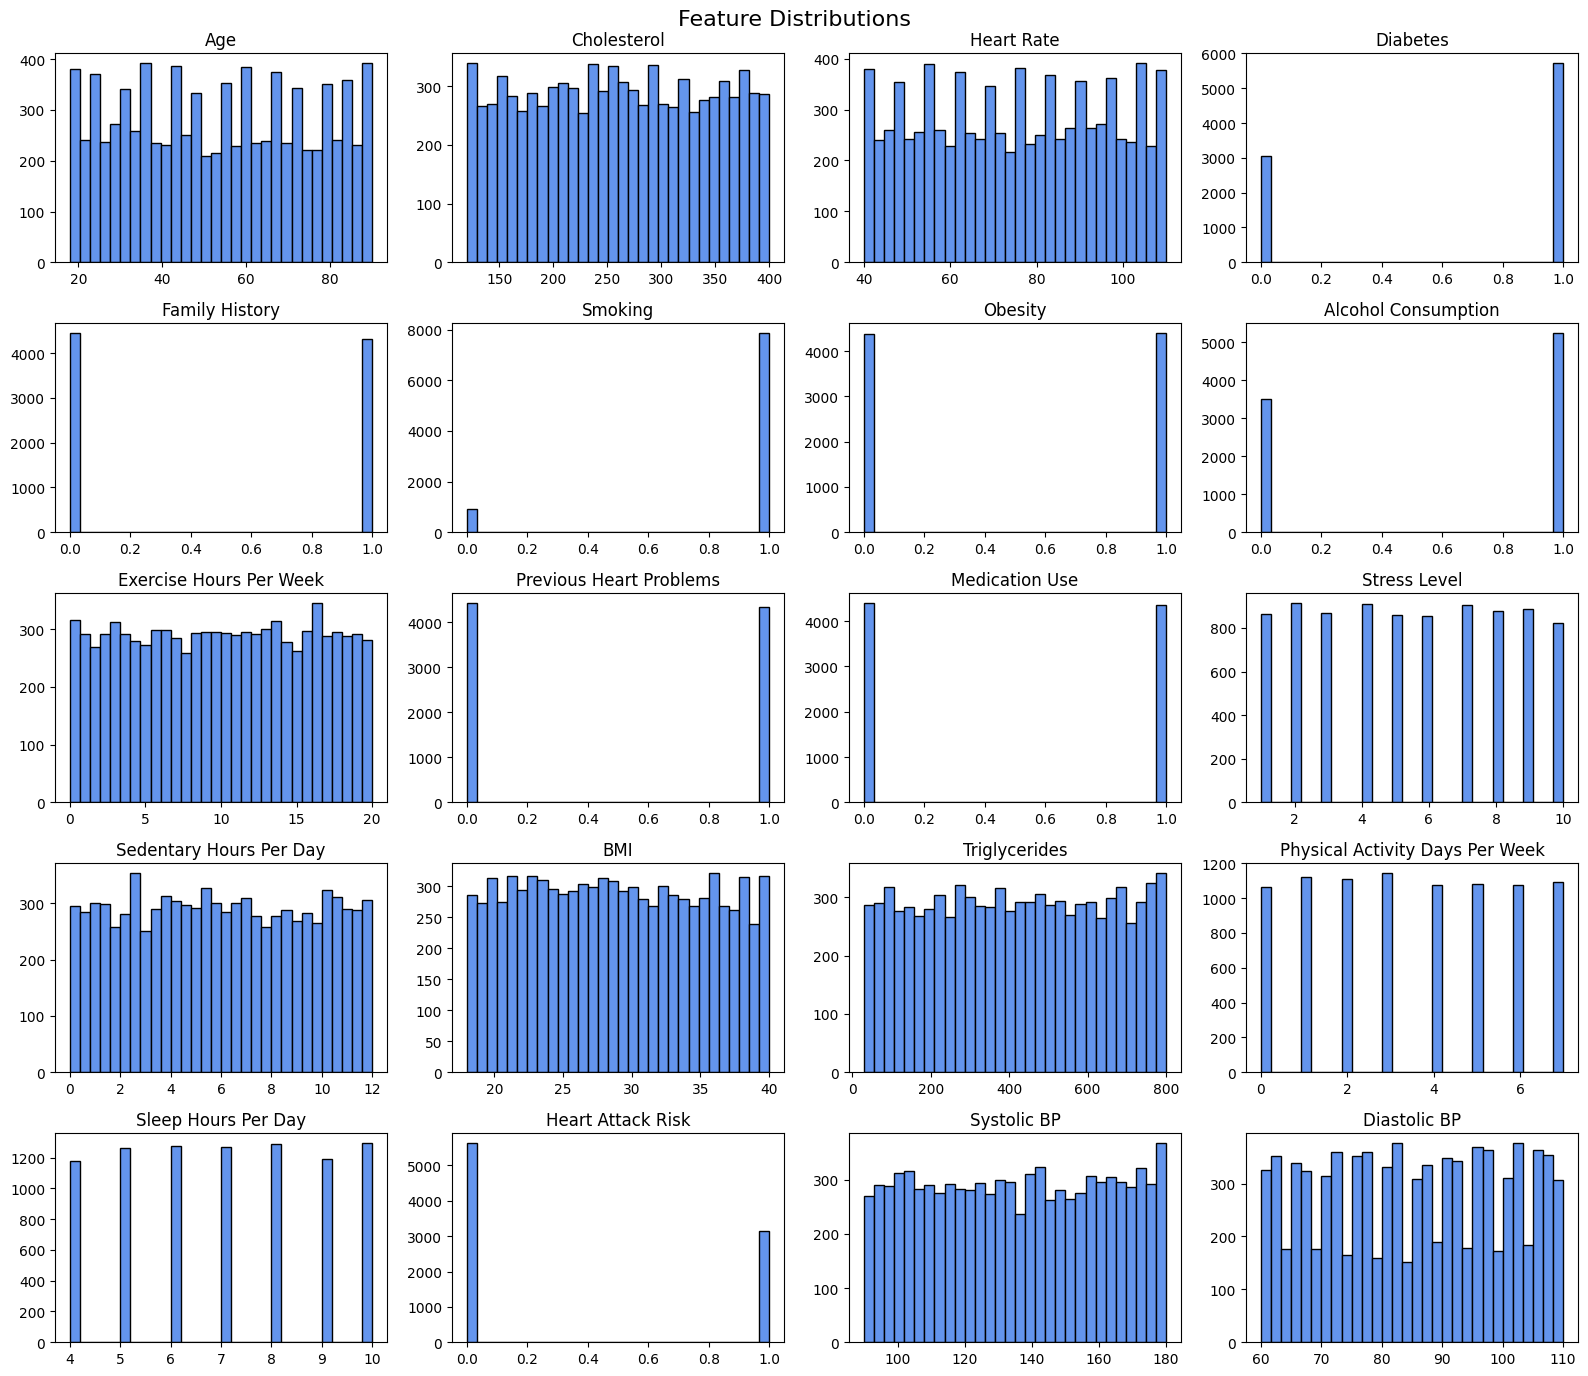

In [26]:
# Drop Unnecessary Columns
df = df.drop(columns=["Patient ID", "Country", "Continent", "Hemisphere", "Sex", "Diet", "Income"], errors="ignore")

# Improved Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f",
            linewidths=0.5, annot_kws={'size': 8}, cbar_kws={'shrink': 0.8})
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Histograms (only for numeric columns after cleaning)
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(16, 14), bins=30, grid=False, edgecolor='black', color='#6495ED')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


Train a Linear Regression Model Using Gradient Descent

In [29]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you already have your dataset loaded in df and preprocessed as necessary
# Drop unnecessary columns
df = df.drop(columns=["Patient ID", "Country", "Continent", "Hemisphere", "Sex", "Diet", "Income"], errors="ignore")

# Handle missing values
df.fillna(df.median(), inplace=True)

# Define Features (X) and Target Variable (y)
X = df.drop(columns=["Heart Attack Risk"])  # Independent variables
y = df["Heart Attack Risk"]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SGDRegressor (Linear Regression using Gradient Descent)
linear_reg = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate="optimal", random_state=42)

# Train the model
linear_reg.fit(X_train, y_train)

# Predict and calculate loss
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# Compute Mean Squared Error for both training and testing sets
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

# Output the results
print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")


Train Loss: 2.0883217468407125e+29
Test Loss: 2.172619500315952e+29


Plot the Loss Curve

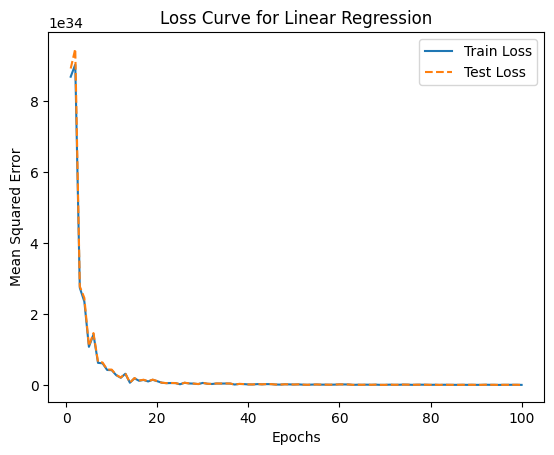

Final Train Loss: 2.435740123741024e+31
Final Test Loss: 2.5096611041799404e+31


In [36]:

# Handle missing values
df.fillna(df.median(), inplace=True)

# Define Features (X) and Target Variable (y)
X = df.drop(columns=["Heart Attack Risk"])  # Independent variables
y = df["Heart Attack Risk"]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SGDRegressor (Linear Regression using Gradient Descent)
linear_reg = SGDRegressor(max_iter=1, tol=None, learning_rate="optimal", random_state=42)

# Initialize lists to store the losses
train_losses = []
test_losses = []
epochs = range(1, 101)

# Training the model over multiple epochs
for epoch in epochs:
    linear_reg.partial_fit(X_train, y_train)  # Update the model with a single iteration
    train_losses.append(mean_squared_error(y_train, linear_reg.predict(X_train)))  # Calculate and store train loss
    test_losses.append(mean_squared_error(y_test, linear_reg.predict(X_test)))  # Calculate and store test loss

# Plot the loss curve
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, test_losses, label="Test Loss", linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Loss Curve for Linear Regression")
plt.legend()
plt.show()

# Final predictions and loss
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print(f"Final Train Loss: {train_loss}")
print(f"Final Test Loss: {test_loss}")


Train and Compare Decision Trees & Random Forest Models

In [32]:
# Train Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_loss = mean_squared_error(y_test, dt_model.predict(X_test))

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_loss = mean_squared_error(y_test, rf_model.predict(X_test))

# Print Losses
print(f"Decision Tree Loss: {dt_loss}")
print(f"Random Forest Loss: {rf_loss}")


Decision Tree Loss: 0.4671990872789504
Random Forest Loss: 0.23375790074158587


Save the Best Model

In [33]:
import joblib

# Find the best model based on the lowest loss
best_model = min([(linear_reg, test_loss, "linear_regression"),
                  (dt_model, dt_loss, "decision_tree"),
                  (rf_model, rf_loss, "random_forest")], key=lambda x: x[1])

print(f"Best Model: {best_model[2]} with Loss: {best_model[1]}")

# Save the best model
joblib.dump(best_model[0], "best_heart_attack_model.pkl")


Best Model: random_forest with Loss: 0.23375790074158587


['best_heart_attack_model.pkl']

Make a Prediction on One Data Point

In [34]:
# Select a single row from the test set
sample_input = X_test.iloc[0].values.reshape(1, -1)

# Load the saved best model and make a prediction
best_model_loaded = joblib.load("best_heart_attack_model.pkl")
prediction = best_model_loaded.predict(sample_input)

# Output the prediction
print(f"Prediction for One Test Sample: {prediction}")


Prediction for One Test Sample: [0.29]


c:\Users\Djafari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Scatter Plot for Linear Regression Fit

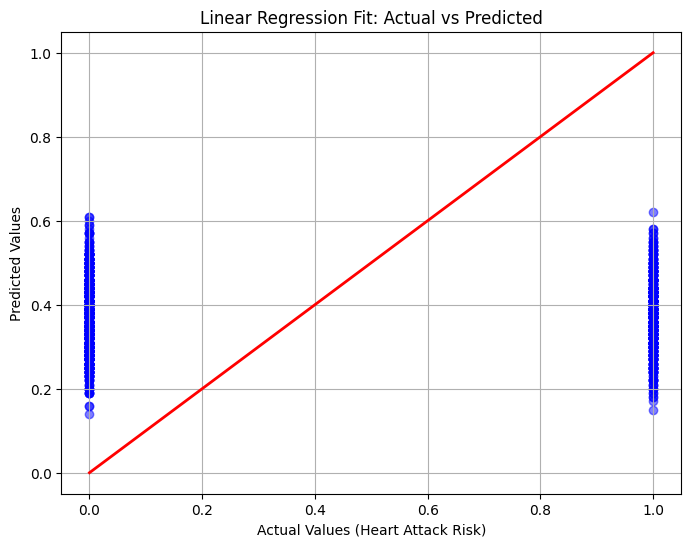

In [35]:
# Predict the values for the test set
y_pred = best_model_loaded.predict(X_test)

# Scatter plot: True vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line of perfect fit
plt.title("Linear Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Values (Heart Attack Risk)")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()
